# Task-3

---



# SMS Spam Detection

In [ ]:
# Import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [ ]:
df=pd.read_csv('https://github.com/Rakhan00/Datasets/raw/main/spam.csv', encoding ='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## EDA

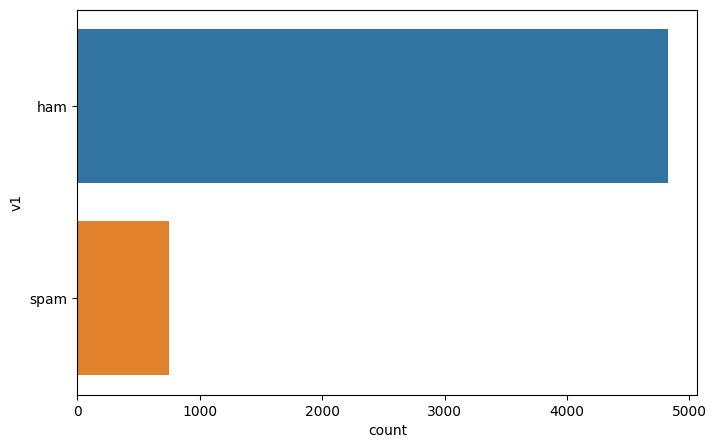

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df,y='v1',hue='v1',legend=False)
plt.show()


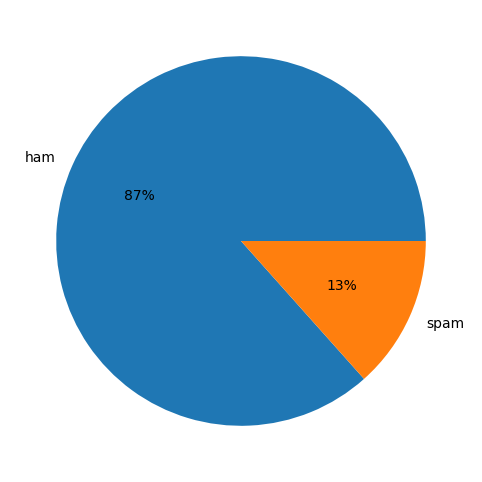

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = df["v1"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

## Data Preprocessing

In [ ]:
# check for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# stopwords=set(stopwords.words('english'))
stop_words = set(stopwords.words("english"))  # set of stopwords
stemmer=LancasterStemmer()

In [ ]:
# for cleaning the data
def cleaning_data(text):
  text=text.lower()
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'www\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'.pic\S+', '', text)
  text = re.sub(r'[^a-zA-Z+]', ' ', text)  # to replace non-characters with a space
  text="".join([i for i in text if i not in string.punctuation]) # remove puncutation from the text
  words=nltk.word_tokenize(text)   # for tokenize the text
  # Use the predefined stop_words variable instead of redefining it inside the function
  text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
  text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
  return text

df['TextCleaning']=df['v2'].apply(cleaning_data)

In [ ]:
df.head()

,v1,v2,TextCleaning
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


## TF-IDF to vectorize the data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize=TfidfVectorizer()
X_train=vectorize.fit_transform(df['TextCleaning'])

## Splitting the data into train and test dataset

In [ ]:
X=X_train
y=df['v1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900, 7226), (1672, 7226), (3900,), (1672,))

## Model Training

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
model.score(X_train,y_train)

0.9964102564102564

## Prediction

In [ ]:
y_pred=model.predict(X_test)

## Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy: ",accuracy_score(y_pred,y_test))

accuracy:  0.97188995215311


**End of the Model**


**Mohd Raza**